In [133]:
# Importing related Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [134]:
# Importando o dataset de treino
df = pd.read_excel('C:/Users/Lucas/OneDrive/Documents/PYTHON PROJECTS/Machine Learning/Monitoramento_primatas_unifeso/knnPrimateMonitoring/Data/trainData.xlsx')

print(df.head())

   Id_primata Sexo do animal  Tamanho do animal(cm)  Peso do animal(gramas)  \
0           0           male                     24                     405   
1           1           male                     19                     410   
2           2         female                     22                     419   
3           3         female                     23                     435   
4           4           male                     23                     430   

  Algum grupo  Idade(ano) Area urbana? Hibrído?  DeadOrAlive  
0          no           6           no       no            1  
1         yes          21           no       no            0  
2         yes          11          yes       no            0  
3          no          14          yes       no            0  
4         yes          13           no      yes            0  


In [135]:
print(df.dtypes)


Id_primata                 int64
Sexo do animal            object
Tamanho do animal(cm)      int64
Peso do animal(gramas)     int64
Algum grupo               object
Idade(ano)                 int64
Area urbana?              object
Hibrído?                  object
DeadOrAlive                int64
dtype: object


In [136]:
print(df.describe())


         Id_primata  Tamanho do animal(cm)  Peso do animal(gramas)  \
count  50000.000000           50000.000000            50000.000000   
mean   24999.500000              21.487800              424.439940   
std    14433.901067               1.712878               14.419851   
min        0.000000              19.000000              400.000000   
25%    12499.750000              20.000000              412.000000   
50%    24999.500000              21.000000              425.000000   
75%    37499.250000              23.000000              437.000000   
max    49999.000000              24.000000              449.000000   

         Idade(ano)   DeadOrAlive  
count  50000.000000  50000.000000  
mean      12.504160      0.667500  
std        6.912512      0.471114  
min        1.000000      0.000000  
25%        6.750000      0.000000  
50%       12.000000      1.000000  
75%       19.000000      1.000000  
max       24.000000      1.000000  


In [137]:
print(df['Sexo do animal'].value_counts())


Sexo do animal
male      25039
female    24961
Name: count, dtype: int64


In [138]:
print(df['Algum grupo'].value_counts())


Algum grupo
yes    40170
no      9830
Name: count, dtype: int64


In [139]:
print(df['Hibrído?'].value_counts())

Hibrído?
no     40038
yes     9962
Name: count, dtype: int64


In [140]:
# Substituindos os valores das variaveis categóricas
df["Sexo do animal"].unique()
df["Sexo do animal"].replace(['female', 'male'], [0,1], inplace=True)

df["Algum grupo"].unique()
df["Algum grupo"].replace(['yes', 'no'], [1,0], inplace=True)

df["Hibrído?"].unique()
df["Hibrído?"].replace(['yes', 'no'], [1,0], inplace=True)

df["Area urbana?"].unique()
df["Area urbana?"].replace(['yes', 'no'], [1,0], inplace=True)

print(df.head())

   Id_primata  Sexo do animal  Tamanho do animal(cm)  Peso do animal(gramas)  \
0           0               1                     24                     405   
1           1               1                     19                     410   
2           2               0                     22                     419   
3           3               0                     23                     435   
4           4               1                     23                     430   

   Algum grupo  Idade(ano)  Area urbana?  Hibrído?  DeadOrAlive  
0            0           6             0         0            1  
1            1          21             0         0            0  
2            1          11             1         0            0  
3            0          14             1         0            0  
4            1          13             0         1            0  


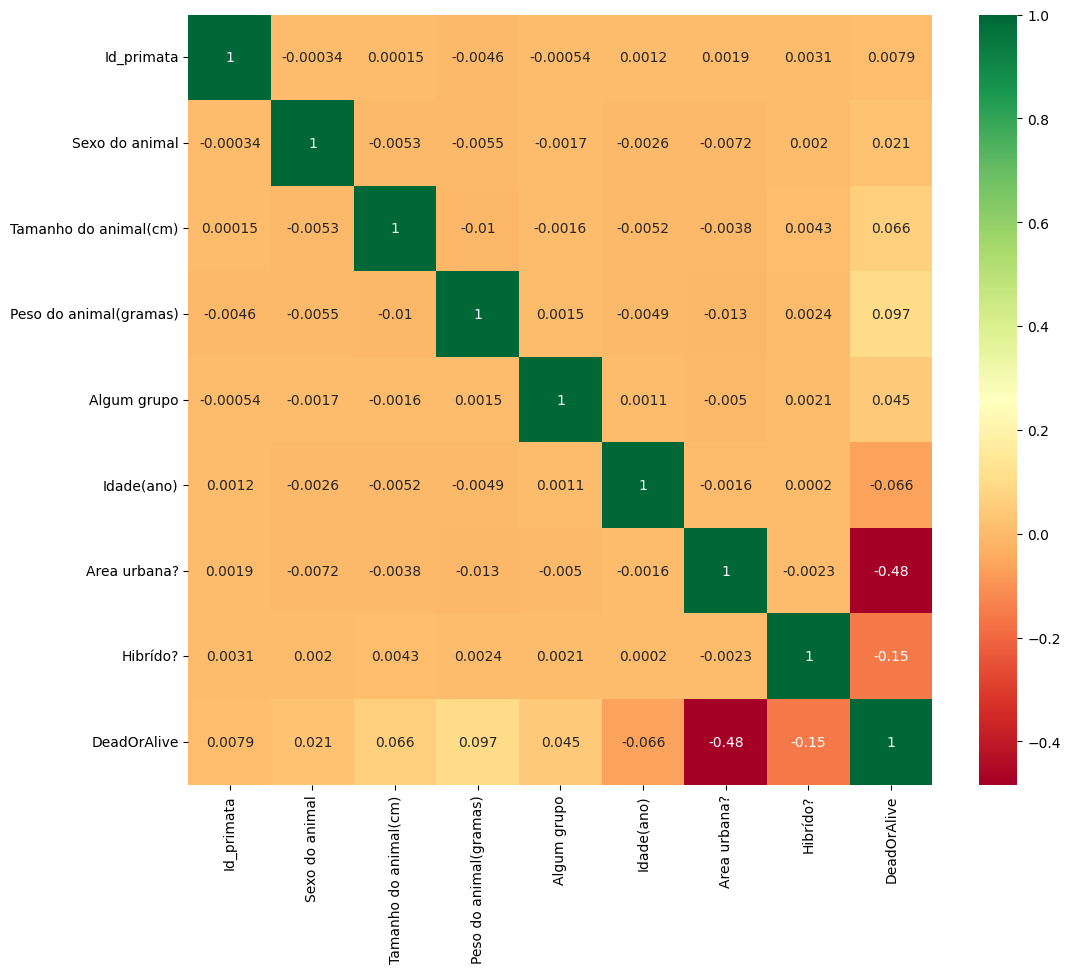

In [141]:
plt.figure(figsize=(12,10))
# Heatmap para auxiliar na escolha das variáveis principais de treino 
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  
plt.show()

X = np.array(df.filter(['Sexo do animal', "Hibrído?", "Tamanho do animal(cm)", "Peso do animal(gramas)", "Idade(ano)"
                        'Algum grupo', "Area urbana?"  ], axis=1))
y = np.array(df.filter(['DeadOrAlive'], axis=1))

# Validação cruzada simples
X_1, X_test, y_1, y_test = train_test_split(X,y, test_size=0.3)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)


 CV accuracy for k=1 is 71

 CV accuracy for k=3 is 75

 CV accuracy for k=5 is 77

 CV accuracy for k=7 is 78

 CV accuracy for k=9 is 78

 CV accuracy for k=11 is 78

 CV accuracy for k=13 is 78

 CV accuracy for k=15 is 77

 CV accuracy for k=17 is 77

 CV accuracy for k=19 is 77

 CV accuracy for k=21 is 76

 CV accuracy for k=23 is 77

 CV accuracy for k=25 is 76

 CV accuracy for k=27 is 76

 CV accuracy for k=29 is 76
Esse é o K ideal:  4
Média: 76.99%
Desvio padrão: 1.63%


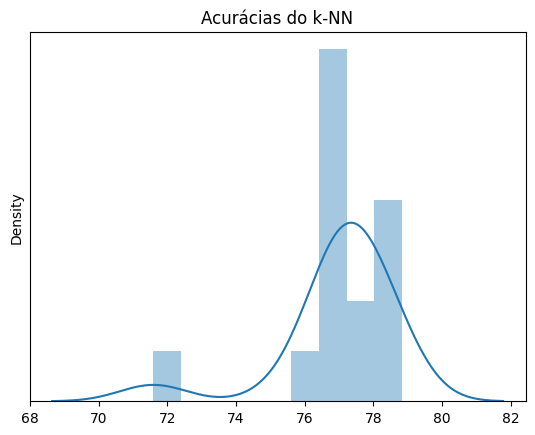

       Id_primata Sexo do animal  Tamanho do animal(cm)  \
0               0           male                     24   
1               1         female                     24   
2               2         female                     20   
3               3         female                     19   
4               4           male                     19   
...           ...            ...                    ...   
24995       24995           male                     24   
24996       24996         female                     20   
24997       24997         female                     20   
24998       24998         female                     24   
24999       24999         female                     23   

       Peso do animal(gramas) Algum grupo  Idade(ano) Area urbana? Hibrído?  
0                         443          no          15          yes       no  
1                         429         yes          13          yes      yes  
2                         409         yes           2    

ValueError: Length of values (10500) does not match length of index (25000)

In [142]:
final_scores = []
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_cv)
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))

optimal_k = final_scores.index(max(final_scores))
print("Esse é o K ideal: ", optimal_k)

print("Média: {:.2f}%".format(np.mean(final_scores)))
print("Desvio padrão: {:.2f}%".format(np.std(final_scores)))

sns.distplot(final_scores)
plt.yticks([])
plt.title("Acurácias do k-NN")
plt.show()

# Obtendo a acurácia se K=5 nos dados de teste
df_test1 = pd.read_excel('C:/Users/Lucas/OneDrive/Documents/PYTHON PROJECTS/Machine Learning/Monitoramento_primatas_unifeso/knnPrimateMonitoring/Data/testData.xlsx')
print(df_test1)

# Substituindos os valores das variaveis categóricas
df_test1["Sexo do animal"].unique()
df_test1["Sexo do animal"].replace(['female', 'male'], [0,1], inplace=True)

df_test1["Algum grupo"].unique()
df_test1["Algum grupo"].replace(['yes', 'no'], [1,0], inplace=True)

df_test1["Hibrído?"].unique()
df_test1["Hibrído?"].replace(['yes', 'no'], [1,0], inplace=True)

df_test1["Area urbana?"].unique()
df_test1["Area urbana?"].replace(['yes', 'no'], [1,0], inplace=True)

print(df_test1.head())

#Criando um arquivo com o resultado da previsão
df_test1['Survived'] = pd.Series(pred, index=df_test1.index)
df_test1["Survived"].unique()
df_test1["Survived"].replace([1, 0], ['yes', 'no'], inplace=True)

print(df_test1)



X_test = np.array(df_test1.filter(['Sexo do animal', "Hibrído?", "Tamanho do animal(cm)", "Peso do animal(gramas)", "Idade(ano)"
                        'Algum grupo', "Area urbana?"  ], axis=1))
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_tr, y_tr)
pred = knn.predict(X_test)
print(pred)

ValueError: Length of values (10500) does not match length of index (25000)

In [ ]:
final_df = df_test1.filter(['Id_primata','Survived'], axis=1)
print(final_df.shape)

final_df.to_excel("pred_Survived.xlsx", index=False)

In [ ]:
# data and target
data, target = df.drop(columns = ['DeadOrAlive']), df['DeadOrAlive']

# KNN classifier model
knn = KNeighborsClassifier()

# K-fold (k=5)
scores = cross_val_score(knn, data, target, cv=5, scoring='accuracy')

print(scores)
# Results
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.3325 0.483  0.481  0.4883 0.6675]
Accuracy: 0.49 (+/- 0.21)
